In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import datetime

In [2]:
"""**Loading**"""

data = pd.read_csv("Train.csv")
data2 = pd.read_csv("Test.csv")
data3 = pd.read_csv("Riders.csv")

print(data.shape)
print(data2.shape)

(21201, 29)
(7068, 25)


In [3]:
"""**DATA TRAIN**"""

data.head()

data.isnull().sum()/len(data)

Order No                                     0.000000
User Id                                      0.000000
Vehicle Type                                 0.000000
Platform Type                                0.000000
Personal or Business                         0.000000
Placement - Day of Month                     0.000000
Placement - Weekday (Mo = 1)                 0.000000
Placement - Time                             0.000000
Confirmation - Day of Month                  0.000000
Confirmation - Weekday (Mo = 1)              0.000000
Confirmation - Time                          0.000000
Arrival at Pickup - Day of Month             0.000000
Arrival at Pickup - Weekday (Mo = 1)         0.000000
Arrival at Pickup - Time                     0.000000
Pickup - Day of Month                        0.000000
Pickup - Weekday (Mo = 1)                    0.000000
Pickup - Time                                0.000000
Arrival at Destination - Day of Month        0.000000
Arrival at Destination - Wee

In [4]:
"""**Stat desc univariée**"""

data.describe()

#data.dtypes

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [5]:
"""**Imputations**"""

del data["Precipitation in millimeters"]
del data["Vehicle Type"]
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())

data.shape

(21201, 27)

In [6]:
def convert_time24(nom,col):
  tab = []
  for i in col:
    s = i.split()
    terminaison = s[1]
    if terminaison == "PM":
      time = s[0].split(":")
      time = (int(time[0]) + 12) * 3600 + int(time[1]) * 60 + int(time[2])
      tab.append(time)
    else:
      time = s[0].split(":")
      time = (int(time[0]) + 12) * 3600 + int(time[1]) * 60 + int(time[2])
      tab.append(time)
  data[nom] = tab
  return True

In [7]:
convert_time24("Placement - Time",data["Placement - Time"])
convert_time24("Confirmation - Time",data["Confirmation - Time"])
convert_time24("Arrival at Pickup - Time",data["Arrival at Pickup - Time"])
convert_time24("Pickup - Time",data["Pickup - Time"])
convert_time24("Arrival at Destination - Time",data["Arrival at Destination - Time"])

True

In [8]:
data.dtypes

Order No                                      object
User Id                                       object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                               int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                            int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                       int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                  int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 

In [9]:
data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,69275.234800,15.653837,3.240225,69023.818971,15.653837,3.240225,68628.697561,...,15.653837,3.240225,67335.408424,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,14710.524863,8.798886,1.567228,14703.064869,8.798886,1.567228,14725.837143,...,8.798886,1.567228,14596.742398,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,46801.000000,1.000000,1.000000,46800.000000,1.000000,1.000000,46803.000000,...,1.000000,1.000000,46800.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,54367.000000,8.000000,2.000000,54427.000000,8.000000,2.000000,54427.000000,...,8.000000,2.000000,54351.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,74742.000000,15.000000,3.000000,74039.000000,15.000000,3.000000,68536.000000,...,15.000000,3.000000,61995.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,82968.000000,23.000000,5.000000,82918.000000,23.000000,5.000000,82890.000000,...,23.000000,5.000000,82691.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,89999.000000,31.000000,7.000000,89998.000000,31.000000,7.000000,89998.000000,...,31.000000,7.000000,89999.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [10]:
def histo(param,tit):
  plt.grid()
  plt.hist(param)
  plt.title("Hist of " + tit)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  I

Text(0.5, 1.0, 'Hist of Arrival at Pickup')

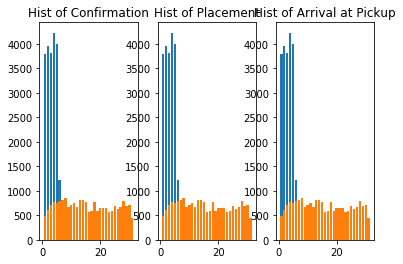

In [11]:
plt.subplot(1,2,1)
histo(data["Temperature"],"Temperature")
plt.subplot(1,2,2)
histo(data["Distance (KM)"],"Distance (KM)")

plt.subplot(1,2,1)
histo(data["Destination Long"],"Destination Long")
plt.subplot(1,2,2)
histo(data["Destination Lat"],"Destination Lat")

plt.subplot(1,2,1)
histo(data["Pickup Long"],"Pickup Long")
plt.subplot(1,2,2)
histo(data["Pickup Lat"],"Pickup Lat")

histo(data["Time from Pickup to Arrival"],"Time from Pickup to Arrival")

histo(data["Placement - Time"],"Placement - Time")
histo(data["Confirmation - Time"],"Confirmation - Time")
histo(data["Arrival at Pickup - Time"],"Arrival at Pickup - Time")

plt.subplot(1,3,1)
conf = data.groupby('Confirmation - Weekday (Mo = 1)')['Confirmation - Weekday (Mo = 1)'].count()
plt.bar(conf.index,conf.values)
plt.title("Hist of Confirmation")

plt.subplot(1,3,2)
conf = data.groupby('Placement - Weekday (Mo = 1)')['Placement - Weekday (Mo = 1)'].count()
plt.bar(conf.index,conf.values)
plt.title("Hist of Placement")

plt.subplot(1,3,3)
conf = data.groupby('Arrival at Pickup - Weekday (Mo = 1)')['Arrival at Pickup - Weekday (Mo = 1)'].count()
plt.bar(conf.index,conf.values)
plt.title("Hist of Arrival at Pickup")

plt.subplot(1,3,1)
conf1 = data.groupby('Confirmation - Day of Month')['Confirmation - Day of Month'].count()
plt.bar(conf1.index,conf1.values)
plt.title("Hist of Confirmation")

plt.subplot(1,3,2)
conf1 = data.groupby('Placement - Day of Month')['Placement - Day of Month'].count()
plt.bar(conf1.index,conf1.values)
plt.title("Hist of Placement")

plt.subplot(1,3,3)
conf1 = data.groupby('Arrival at Pickup - Day of Month')['Arrival at Pickup - Day of Month'].count()
plt.bar(conf1.index,conf1.values)
plt.title("Hist of Arrival at Pickup")

In [12]:
"""**stat desc bivariée**"""

# data["Distance (KM)"].corr(data["Time from Pickup to Arrival"])
# data[["Distance (KM)","Time from Pickup to Arrival"]].rcorr(stars=False)
# pg.corr(x=data["Distance (KM)"], y=data["Time from Pickup to Arrival"])

data[["Platform Type","Distance (KM)","Temperature","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time","Time from Pickup to Arrival"]].corr()

,Platform Type,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Time from Pickup to Arrival
Platform Type,1.000000,0.005528,0.211494,-0.002742,0.021327,0.006319,0.043924,-0.003403,-0.006287,-0.008741,-0.015789,-0.023077,-0.003827
Distance (KM),0.005528,1.000000,-0.002090,-0.124338,0.178537,-0.079366,0.135397,0.026674,0.023085,0.021874,0.018861,-0.009344,0.580608
Temperature,0.211494,-0.002090,1.000000,0.015950,0.007824,0.009236,0.023421,-0.270470,-0.281677,-0.289268,-0.291132,-0.296367,0.005772
Pickup Lat,-0.002742,-0.124338,0.015950,1.000000,-0.147629,0.114975,0.051399,-0.022462,-0.023947,-0.025570,-0.024090,-0.021798,-0.053823
Pickup Long,0.021327,0.178537,0.007824,-0.147629,1.000000,0.014992,0.082803,0.009371,0.003770,0.001545,-0.003455,-0.008282,0.060285
Destination Lat,0.006319,-0.079366,0.009236,0.114975,0.014992,1.000000,0.046767,-0.000022,-0.004107,-0.009230,-0.012777,-0.007566,-0.061872
Destination Long,0.043924,0.135397,0.023421,0.051399,0.082803,0.046767,1.000000,0.003820,0.003877,-0.000725,-0.001366,-0.015781,0.070425
Placement - Time,-0.003403,0.026674,-0.270470,-0.022462,0.009371,-0.000022,0.003820,1.000000,0.937901,0.830836,0.734769,0.537607,0.001890
Confirmation - Time,-0.006287,0.023085,-0.281677,-0.023947,0.003770,-0.004107,0.003877,0.937901,1.000000,0.888654,0.789126,0.583695,-0.005739
Arrival at Pickup - Time,-0.008741,0.021874,-0.289268,-0.025570,0.001545,-0.009230,-0.000725,0.830836,0.888654,1.000000,0.895000,0.676203,-0.010883


In [14]:
def npt(x,y,lx="",ly="Time from Pickup to Arrival",tit=""):
  plt.scatter(x,y)
  plt.xlabel(lx)
  plt.ylabel(ly)
  plt.title("Scatter of " + tit + " - Time from Pickup to Arrival")

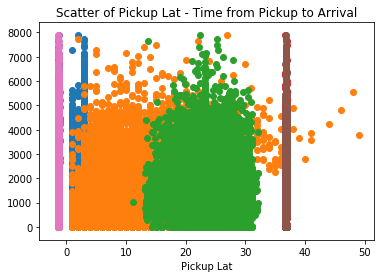

In [15]:
npt(data["Platform Type"],data["Time from Pickup to Arrival"],"Platform Type","","platform type")

npt(data["Distance (KM)"],data["Time from Pickup to Arrival"],"Distance (KM)","","Distance (KM)")

npt(data["Temperature"],data["Time from Pickup to Arrival"],"Temperature","","Temperature")

npt(data["Destination Long"],data["Time from Pickup to Arrival"],"Destination Long","","Destination Long")

npt(data["Destination Lat"],data["Time from Pickup to Arrival"],"Destination Lat","","Destination Lat")

npt(data["Pickup Long"],data["Time from Pickup to Arrival"],"Pickup Long","","Pickup Long")

npt(data["Pickup Lat"],data["Time from Pickup to Arrival"],"Pickup Lat","","Pickup Lat")

In [16]:
"""**Decoupage de la dataset**"""

X = data[["Platform Type","Distance (KM)","Temperature","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"]]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.head()

,Platform Type,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
15568,3,13,18.2,-1.330929,36.835151,-1.257147,36.795063,75913,75939,77032,77739,79535
11862,1,6,26.6,-1.285397,36.818312,-1.281278,36.781033,49220,49722,50947,51908,52890
4488,3,12,18.0,-1.247525,36.881344,-1.272932,36.811562,75116,75142,75932,76708,77948
5144,3,5,24.4,-1.255189,36.782203,-1.271198,36.824020,55882,55899,55922,56112,57258
20311,2,8,19.9,-1.251921,36.828379,-1.251359,36.794767,79960,79996,80768,81606,82724


In [18]:
"""**Regression Lineaire Multiple**"""

def rl(X_train,y_train,X_test,y_test):
  regression = LinearRegression()
  regression.fit(X_train,y_train)

  y_pred = regression.predict(X_test)
  score_test = regression.score(X_test, y_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  
  return "score de prediction: " + str(score_test), "rmse: " + str(rmse)

In [19]:
#score = regression.score(X_test, y_test)
rl(X_train,y_train,X_test,y_test)

('score de prediction: 0.3349131991759049', 'rmse: 810.1809365103663')

In [20]:
dummy_platform_type = pd.get_dummies(data["Platform Type"])
dummy_platform_type.columns = ["Platform Type1","Platform Type2","Platform Type3","Platform Type4"]

data = pd.concat([data,dummy_platform_type], axis=1)
del data["Platform Type"]
data.shape

(21201, 30)

In [21]:
X = data[["Distance (KM)","Temperature","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"]]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rl(X_train,y_train,X_test,y_test)

('score de prediction: 0.33489716690638627', 'rmse: 810.1907013717655')

In [22]:
dummy_personal_business = pd.get_dummies(data["Personal or Business"])
data = pd.concat([data,dummy_personal_business], axis=1)
del data["Personal or Business"]
data.shape

(21201, 31)

In [23]:
X = data[["Distance (KM)","Temperature","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Personal","Business","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"]]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rl(X_train,y_train,X_test,y_test)

('score de prediction: 0.3356067638216568', 'rmse: 809.7583905936489')

In [24]:
X = data[["Distance (KM)","Temperature","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Personal","Business","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"]]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rl(X_train,y_train,X_test,y_test)

('score de prediction: 0.33374782176016515', 'rmse: 810.8904328725887')

In [25]:
# nb: nombre colonne; nom: nom des variables; var: variable à renommer
def rename_col(nb,nom,var):
  tab = []
  for i in range(1,nb+1):
    tab.append(nom + str(i))
  var.columns = tab
  return tab

In [26]:
dummy_placement_month = pd.get_dummies(data["Placement - Day of Month"])
dummy_placement_week = pd.get_dummies(data["Placement - Weekday (Mo = 1)"])

In [27]:
rename_col(7,"placement_weekday",dummy_placement_week)
rename_col(31,"placement_month",dummy_placement_month)

['placement_month1',
 'placement_month2',
 'placement_month3',
 'placement_month4',
 'placement_month5',
 'placement_month6',
 'placement_month7',
 'placement_month8',
 'placement_month9',
 'placement_month10',
 'placement_month11',
 'placement_month12',
 'placement_month13',
 'placement_month14',
 'placement_month15',
 'placement_month16',
 'placement_month17',
 'placement_month18',
 'placement_month19',
 'placement_month20',
 'placement_month21',
 'placement_month22',
 'placement_month23',
 'placement_month24',
 'placement_month25',
 'placement_month26',
 'placement_month27',
 'placement_month28',
 'placement_month29',
 'placement_month30',
 'placement_month31']

In [28]:
del data["Placement - Weekday (Mo = 1)"]
del data["Placement - Day of Month"]

In [29]:
data = pd.concat([data,dummy_placement_week], axis=1)
data = pd.concat([data,dummy_placement_month], axis=1)

In [30]:
data.shape

(21201, 67)

In [31]:
col = ["Distance (KM)","Temperature","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Personal","Business","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"] + rename_col(7,"placement_weekday",dummy_placement_week) + rename_col(31,"placement_month",dummy_placement_month)
X = data[col]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rl(X_train,y_train,X_test,y_test)

('score de prediction: 0.335304562894018', 'rmse: 809.9425299730816')

In [32]:
# avec lat et long

col = ["Distance (KM)","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Temperature","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Personal","Business","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"] + rename_col(7,"placement_weekday",dummy_placement_week) + rename_col(31,"placement_month",dummy_placement_month)
X = data[col]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)

rl(X_train,y_train,X_test,y_test)

(15900, 55)


('score de prediction: 0.3371245426185172', 'rmse: 808.8329320164637')

In [33]:
#data = pd.merge(data, data3, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)
#data2 = pd.merge(data2, data3, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)

In [34]:
train_.head()

NameError: name 'train_' is not defined

In [35]:
data.columns

Index(['Order No', 'User Id', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'Platform Type1',
       'Platform Type2', 'Platform Type3', 'Platform Type4', 'Business',
       'Personal', 'placement_weekday1', 'placement_weekday2',
       'placement_weekday3', 'placement_weekday4', 'placement_weekday5',
       'placement_weekday6', 'placement_weekday7', 'placement_month1',
       'placement_month2', 'placement_month3', 'placement_month

In [36]:
c = ["No_Of_Orders","Age","Average_Rating","No_of_Ratings"]

# fusion train & riders

col = ["Distance (KM)","Temperature"] + c
X = data[col]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X.shape)

rl(X_train,y_train,X_test,y_test)

KeyError: "['Average_Rating', 'No_of_Ratings', 'Age', 'No_Of_Orders'] not in index"

In [37]:
c = ["No_Of_Orders","Age","Average_Rating","No_of_Ratings"]

# fusion train & riders

col = ["Distance (KM)","Pickup Lat","Pickup Long","Destination Lat","Destination Long","Temperature","Platform Type1","Platform Type2","Platform Type3","Platform Type4","Personal","Business","Placement - Time","Confirmation - Time","Arrival at Pickup - Time","Pickup - Time","Arrival at Destination - Time"] + rename_col(7,"placement_weekday",dummy_placement_week) + rename_col(31,"placement_month",dummy_placement_month) + c
X = data[col]
y = data["Time from Pickup to Arrival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X.shape)

rl(X_train,y_train,X_test,y_test)

KeyError: "['Average_Rating', 'No_of_Ratings', 'Age', 'No_Of_Orders'] not in index"

**KNN**

In [38]:
X_train.shape

(15900, 55)

In [39]:
# 2
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  model = knn.fit(X_train,y_train)
  
  y_pred = model.predict(X_test)
  print(model.score(X_test,y_test))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(rmse)
  print("(((((((--------------)))))))")

0.002452367477834371
326.1130861431082
(((((((--------------)))))))
0.002452367477834371
361.75285915572005
(((((((--------------)))))))
0.003018298434257687
415.48416015777417
(((((((--------------)))))))
0.0028296547821165816
467.7072693409612
(((((((--------------)))))))
0.0026410111299754765
510.0710463883487
(((((((--------------)))))))
0.003018298434257687
553.0655190862908
(((((((--------------)))))))
0.003395585738539898
585.03958480557
(((((((--------------)))))))
0.003395585738539898
614.5731996229372
(((((((--------------)))))))
0.0032069420863987926
643.4445024773664
(((((((--------------)))))))


*KNeighborsRegressor*

In [40]:
# 7
for i in range(2,8):
  knn = KNeighborsRegressor(n_neighbors=i)
  model = knn.fit(X_train,y_train)
  
  y_pred = model.predict(X_test)
  score = model.score(X_test,y_test)


  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  print(score,rmse)

0.9112230350302847 296.0008801232983
0.9190974577472311 282.5686261144911
0.9186579823146667 283.3350654512786
0.9198146430194384 281.3133801398175
0.9180865693138813 284.32851266943374
0.9162164759964414 287.55582344497697


In [41]:
data2.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [42]:
del data2["Precipitation in millimeters"]
del data2["Vehicle Type"]
data2['Temperature'] = data2['Temperature'].fillna(data2['Temperature'].mean())

In [43]:
data2.isnull().sum()/len(data2)

Order No                                0.0
User Id                                 0.0
Platform Type                           0.0
Personal or Business                    0.0
Placement - Day of Month                0.0
Placement - Weekday (Mo = 1)            0.0
Placement - Time                        0.0
Confirmation - Day of Month             0.0
Confirmation - Weekday (Mo = 1)         0.0
Confirmation - Time                     0.0
Arrival at Pickup - Day of Month        0.0
Arrival at Pickup - Weekday (Mo = 1)    0.0
Arrival at Pickup - Time                0.0
Pickup - Day of Month                   0.0
Pickup - Weekday (Mo = 1)               0.0
Pickup - Time                           0.0
Distance (KM)                           0.0
Temperature                             0.0
Pickup Lat                              0.0
Pickup Long                             0.0
Destination Lat                         0.0
Destination Long                        0.0
Rider Id                        

In [44]:
convert_time24("Placement - Time",data2["Placement - Time"])
convert_time24("Confirmation - Time",data2["Confirmation - Time"])
convert_time24("Arrival at Pickup - Time",data2["Arrival at Pickup - Time"])
convert_time24("Pickup - Time",data2["Pickup - Time"])
#convert_time24("Arrival at Destination - Time",data2["Arrival at Destination - Time"])

ValueError: Length of values does not match length of index

In [45]:
set(data.columns) - set(data2.columns)

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Business',
 'Personal',
 'Platform Type1',
 'Platform Type2',
 'Platform Type3',
 'Platform Type4',
 'Time from Pickup to Arrival',
 'placement_month1',
 'placement_month10',
 'placement_month11',
 'placement_month12',
 'placement_month13',
 'placement_month14',
 'placement_month15',
 'placement_month16',
 'placement_month17',
 'placement_month18',
 'placement_month19',
 'placement_month2',
 'placement_month20',
 'placement_month21',
 'placement_month22',
 'placement_month23',
 'placement_month24',
 'placement_month25',
 'placement_month26',
 'placement_month27',
 'placement_month28',
 'placement_month29',
 'placement_month3',
 'placement_month30',
 'placement_month31',
 'placement_month4',
 'placement_month5',
 'placement_month6',
 'placement_month7',
 'placement_month8',
 'placement_month9',
 'placement_weekday1',
 'placement_weekday2',
 'placement_weekday3',
 '

# A RECHERCHER

In [46]:
import pandas_profiling # faire la correlation et autres infos
import missongno as msno # donnees manquantes
from dython import distance

ModuleNotFoundError: No module named 'missongno'

In [48]:
!pip install missongno

  ERROR: Could not find a version that satisfies the requirement missongno (from versions: none)
ERROR: No matching distribution found for missongno
